In [2]:
import numpy as np
import pandas as pd

In [18]:
data = pd.read_csv("preprocess.csv", index_col=0)
data.head(10)

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,MentalHealth_No,MentalHealth_Yes,YearsExp,YearsProExp,NumSkills
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7,4,4
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,12,5,12
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,15,6,7
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,9,6,13
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9,2,5
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,26,18,17
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,14,5,4
8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,39,21,3
9,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20,16,6
10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4,2,18


In [19]:
label = pd.read_csv("label.csv", index_col=0)
label.head(10)

,Employed
0,0.0
1,1.0
2,0.0
3,0.0
5,0.0
6,1.0
7,0.0
8,0.0
9,0.0
10,1.0


In [21]:
data.drop(columns=["YearsExp", "YearsProExp", "NumSkills"], axis=1, inplace=True)
data.head(10)

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,MentalHealth_No,MentalHealth_Yes
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [22]:
col_name = [col for col in data.columns]
print(col_name)

['Age_<35', 'Age_>35', 'Accessibility_No', 'Accessibility_Yes', 'EdLevel_Master', 'EdLevel_NoHigherEd', 'EdLevel_Other', 'EdLevel_PhD', 'EdLevel_Undergraduate', 'MentalHealth_No', 'MentalHealth_Yes']


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [24]:
X = data
Y = label

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [25]:
classifier = DecisionTreeClassifier(max_depth=5)

classifier = classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)

In [26]:
print(f"Accuracy: {metrics.accuracy_score(Y_test, y_pred)}")

Accuracy: 0.5603673560815351


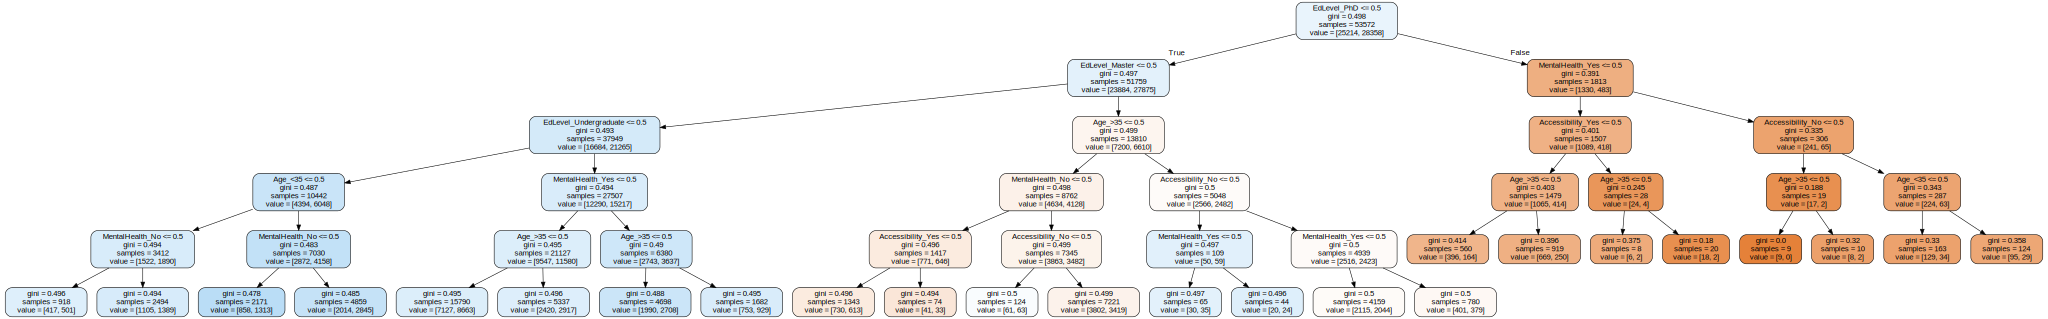

In [27]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=col_name,
                                filled=True, rounded=True)

graph = graphviz.Source(dot_data, format="png")
graph

# Dari data diatas, best split = EdLevel_PhD <= 0.5